In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.set_printoptions(precision=4)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/okyx/clustering/master/Iris.csv')

In [ ]:
data.columns=['Id',0,1,2,3,'Species']

In [ ]:
data

,Id,0,1,2,3,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Y = data.pop('Species')
X = data[[0,1,2,3]]

In [ ]:
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


normalisasi

In [ ]:
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

In [ ]:
X

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


compute cov

In [ ]:
S = (1/X.shape[0]) * np.dot(X.T,X)

compute eigen

In [ ]:
eigval , eigvec = np.linalg.eig(S)

In [ ]:
sort_indices = np.argsort(eigval)[::-1]

In [ ]:
eigvals = eigval[sort_indices]
eigvec = eigvec[:,sort_indices]

In [ ]:
num_component=2
component = eigvec[:,:num_component]

compute transformation

In [ ]:
transform = np.dot(X,component)

In [ ]:
transform

array([[-2.2645e+00, -5.0570e-01],
       [-2.0864e+00,  6.5540e-01],
       [-2.3680e+00,  3.1848e-01],
       [-2.3042e+00,  5.7537e-01],
       [-2.3888e+00, -6.7477e-01],
       [-2.0705e+00, -1.5185e+00],
       [-2.4457e+00, -7.4563e-02],
       [-2.2338e+00, -2.4761e-01],
       [-2.3420e+00,  1.0951e+00],
       [-2.1887e+00,  4.4863e-01],
       [-2.1635e+00, -1.0706e+00],
       [-2.3274e+00, -1.5859e-01],
       [-2.2241e+00,  7.0912e-01],
       [-2.6397e+00,  9.3828e-01],
       [-2.1923e+00, -1.8900e+00],
       [-2.2515e+00, -2.7224e+00],
       [-2.2028e+00, -1.5138e+00],
       [-2.1902e+00, -5.1430e-01],
       [-1.8941e+00, -1.4311e+00],
       [-2.3399e+00, -1.1580e+00],
       [-1.9146e+00, -4.3047e-01],
       [-2.2046e+00, -9.5246e-01],
       [-2.7742e+00, -4.8952e-01],
       [-1.8204e+00, -1.0675e-01],
       [-2.2282e+00, -1.6219e-01],
       [-1.9570e+00,  6.0789e-01],
       [-2.0521e+00, -2.6601e-01],
       [-2.1682e+00, -5.5202e-01],
       [-2.1403e+00,

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Y = Y.map({'Iris-setosa':1,'Iris-virginica':3,'Iris-versicolor':2})

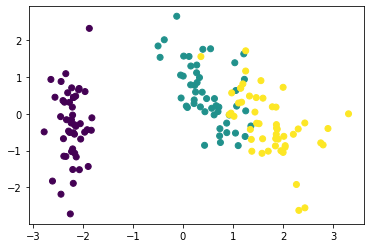

In [ ]:
plt.scatter(transform[:,0],transform[:,1],c=Y)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
transformsk = pca.fit_transform(X)

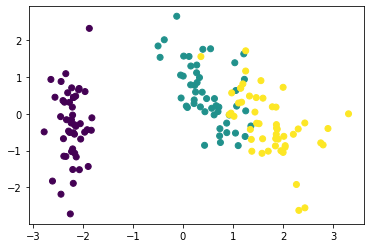

In [ ]:
plt.scatter(transformsk[:,0],transformsk[:,1]*-1,c=Y)